## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

## Loading Data


In [2]:
df= pd.read_excel(r"C:\Users\Jyot\Desktop\DA_Internships\Indolike\DA_Tasks\Customer Segmentation\online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


The dataset contain information on retail transactions. Here are the columns in the data:

Invoice: The invoice number associated with the transaction.

StockCode: The code of the product.

Description: A description of the product.

Quantity: The number of units of the product purchased.

InvoiceDate: The date and time of the transaction.

Price: The price per unit of the product.

Customer ID: A unique identifier for the customer.

Country: The country where the transaction took place.

In [3]:
cs_df= df.copy()

## Data  Understanding

In [4]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
cs_df.shape

(525461, 8)

In [6]:
cs_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


## Data Cleaning

In [7]:
import re 
cs_df['Invoice'].astype(str).str.contains('C', flags=re.IGNORECASE, regex=True)

0         False
1         False
2         False
3         False
4         False
          ...  
525456    False
525457    False
525458    False
525459    False
525460    False
Name: Invoice, Length: 525461, dtype: bool

In [8]:
cs_df[cs_df['Invoice'].astype(str).str.contains('C', flags=re.IGNORECASE, regex=True)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
cancaelled_invoice = cs_df[cs_df['Invoice'].astype(str).str.contains('C', flags=re.IGNORECASE, regex=True)].index
cancaelled_invoice

Index([   178,    179,    180,    181,    182,    183,    184,    185,    186,
          196,
       ...
       524688, 524691, 524692, 524693, 524694, 524695, 524696, 524697, 524698,
       525282],
      dtype='int64', length=10206)

In [10]:
cs_df = cs_df[~ cs_df['Invoice'].str.startswith('C', na=False)]
cs_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [11]:
cs_df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107560
Country             0
dtype: int64

In [12]:
cs_df.dropna(subset='Customer ID')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [13]:
cs_df.drop_duplicates(inplace=True)

In [14]:
cs_df.dropna(inplace=True)

In [15]:
cs_df['InvoiceDate'] = pd.to_datetime(cs_df['InvoiceDate'])

In [16]:
cs_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [17]:
cs_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,400947.000000,400947,400947.000000,400947.000000
mean,13.768523,2010-07-01 04:56:11.466452992,3.305571,15361.454639
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 13:13:00,1.250000,13985.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000
75%,12.000000,2010-10-14 13:57:00,3.750000,16805.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,97.639816,NaN,35.046376,1680.669487


## Feature Engineering

In [18]:
cs_df['Total_Price'] = cs_df['Price'] * cs_df['Quantity']
cs_df['Total_Price']
cs_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [19]:
ref_date = df['InvoiceDate'].max()

In [20]:
aggr= cs_df.groupby(by="Customer ID", as_index=False).agg(
        LastInvoicedate= ("InvoiceDate", "max"),
        Frequency= ("Invoice", "nunique"),
        MonetaryValue= ("Total_Price", "sum")
    )

aggr.head()

,Customer ID,LastInvoicedate,Frequency,MonetaryValue
0,12346.0,2010-06-28 13:53:00,11,372.86
1,12347.0,2010-12-07 14:57:00,2,1323.32
2,12348.0,2010-09-27 14:59:00,1,222.16
3,12349.0,2010-10-28 08:23:00,3,2671.14
4,12351.0,2010-11-29 15:23:00,1,300.93


In [21]:
max_invoice_date = aggr["LastInvoicedate"].max()

aggr["Recency"] = (max_invoice_date - aggr["LastInvoicedate"]).dt.days

aggr.head()


,Customer ID,LastInvoicedate,Frequency,MonetaryValue,Recency
0,12346.0,2010-06-28 13:53:00,11,372.86,164
1,12347.0,2010-12-07 14:57:00,2,1323.32,2
2,12348.0,2010-09-27 14:59:00,1,222.16,73
3,12349.0,2010-10-28 08:23:00,3,2671.14,42
4,12351.0,2010-11-29 15:23:00,1,300.93,10


In [22]:
rfm = cs_df.groupby('Customer ID').agg ( {
'InvoiceDate' : lambda x: ( ref_date - x.max()).days,
'Invoice' : 'count',
'Total_Price' : 'sum'
}).rename(columns = {'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Total_Price':'Monetary'})

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,164,33,372.86
12347.0,2,71,1323.32
12348.0,73,20,222.16
12349.0,42,102,2671.14
12351.0,10,21,300.93


In [23]:
rfm = pd.DataFrame(rfm, columns=['Recency', 'Frequency', 'Monetary'])
rfm.head()  

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,164,33,372.86
12347.0,2,71,1323.32
12348.0,73,20,222.16
12349.0,42,102,2671.14
12351.0,10,21,300.93


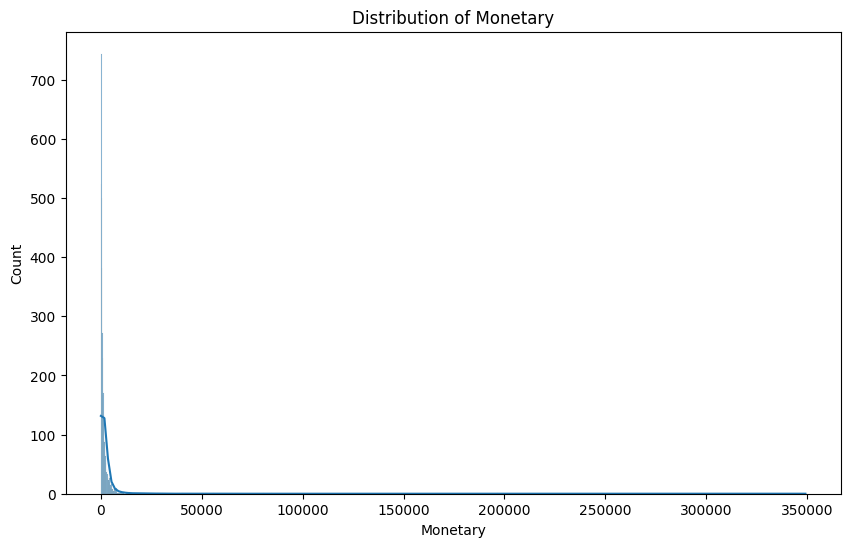

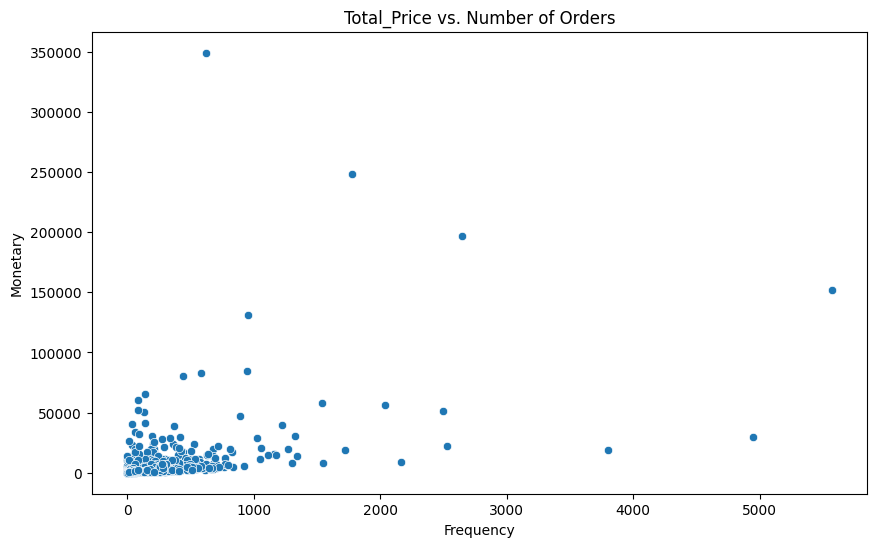

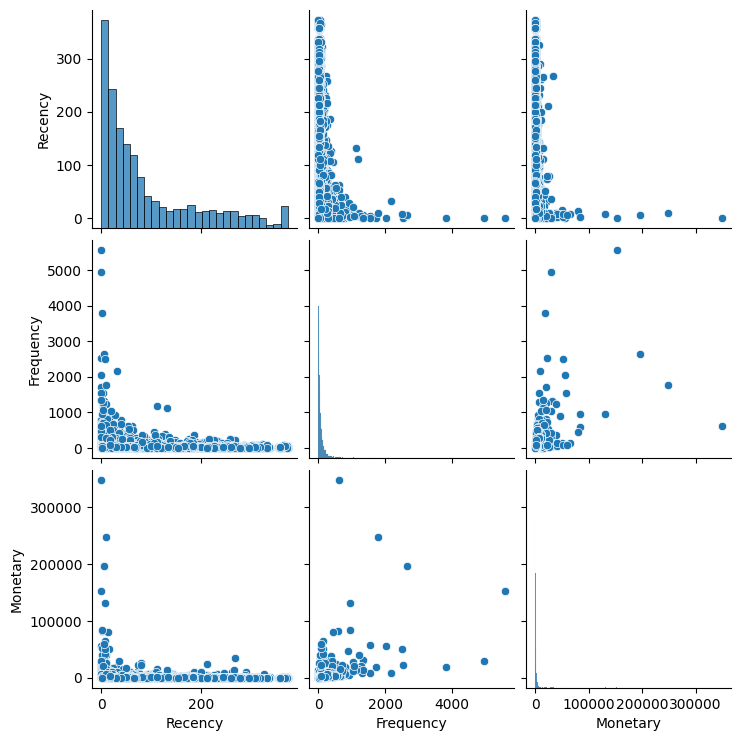

In [24]:
# Plot the distribution of TotalSpent
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Distribution of Monetary')
plt.show()

# Plot the relationship between TotalSpent and NumOrders
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary')
plt.title('Total_Price vs. Number of Orders')
plt.show()

# Pairplot to see relationships between features
sns.pairplot(rfm)
plt.show()

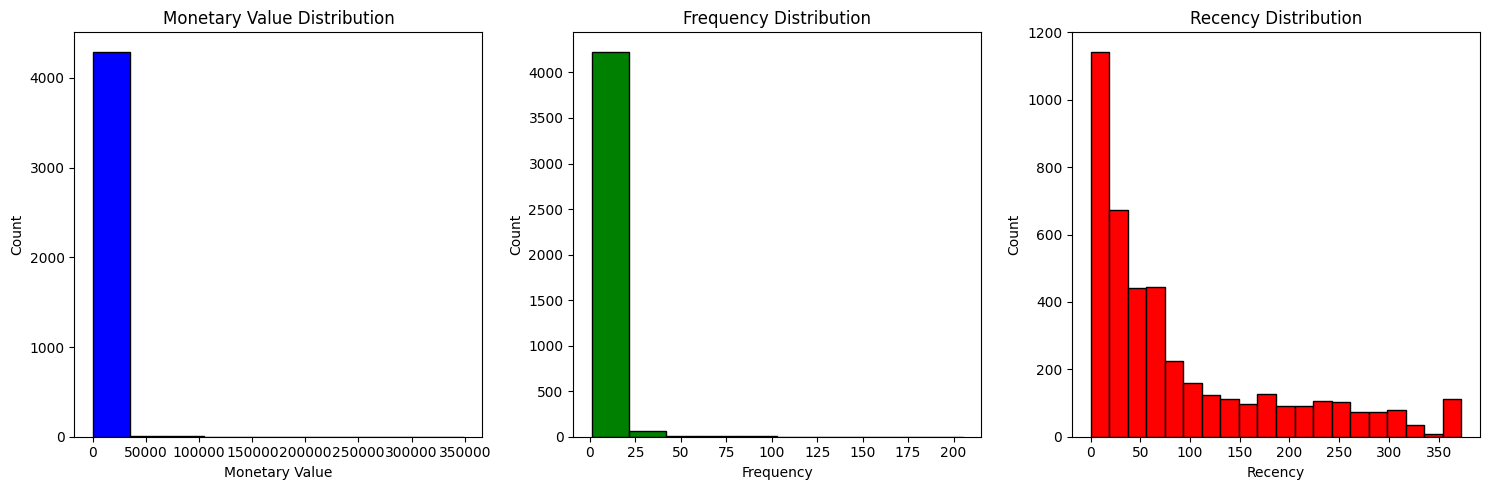

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggr['MonetaryValue'], bins=10, color='blue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggr['Frequency'], bins=10, color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggr['Recency'], bins=20, color='red', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

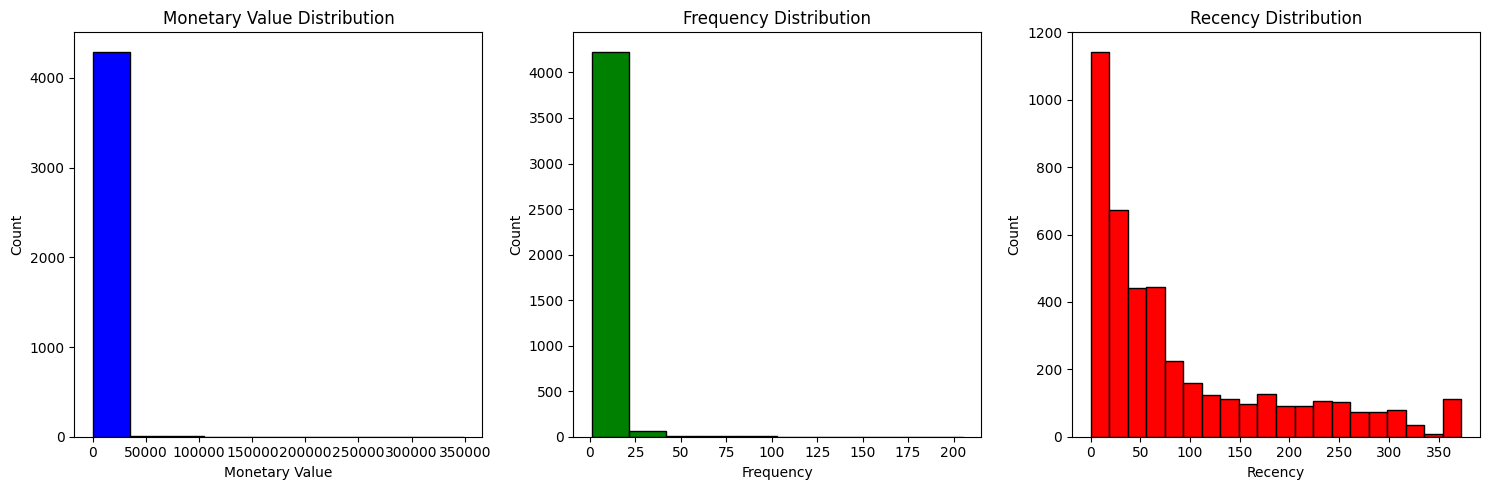

In [26]:
plt.figure(figsize=(15, 5))

# Histogram 1: Monetary Value
plt.subplot(1, 3, 1)
plt.hist(aggr['MonetaryValue'], bins=10, color='blue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

# Histogram 2: Frequency
plt.subplot(1, 3, 2)
plt.hist(aggr['Frequency'], bins=10, color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Histogram 2: Recency
plt.subplot(1, 3, 3)
plt.hist(aggr['Recency'], bins=20, color='red', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## KMeans Clustering


In [27]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

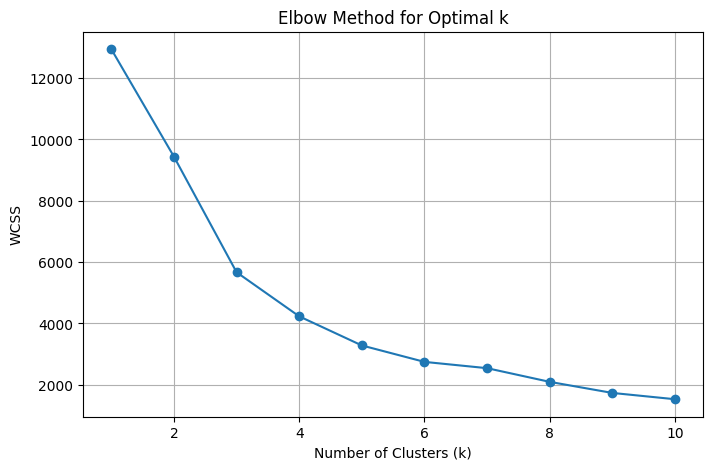

In [28]:
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss[k] = kmeans.inertia_


plt.figure(figsize=(8, 5))
plt.plot(list(wcss.keys()), list(wcss.values()), marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(rfm_scaled)

print(Y)

[0 4 4 ... 0 4 4]


In [30]:
unique_clusters = np.unique(Y)


num_clusters = len(unique_clusters)

print("Cluster labels:", unique_clusters)
print("Number of clusters:", num_clusters)

Cluster labels: [0 1 2 3 4]
Number of clusters: 5


In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,164,33,372.86,1
12347.0,2,71,1323.32,0
12348.0,73,20,222.16,0
12349.0,42,102,2671.14,0
12351.0,10,21,300.93,0


## Analyzing the Cluster Characteristics

In [32]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary', 'Cluster'], dtype='object')

In [33]:
kmeans = KMeans(n_clusters=5)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Monetary', 'Frequency']])


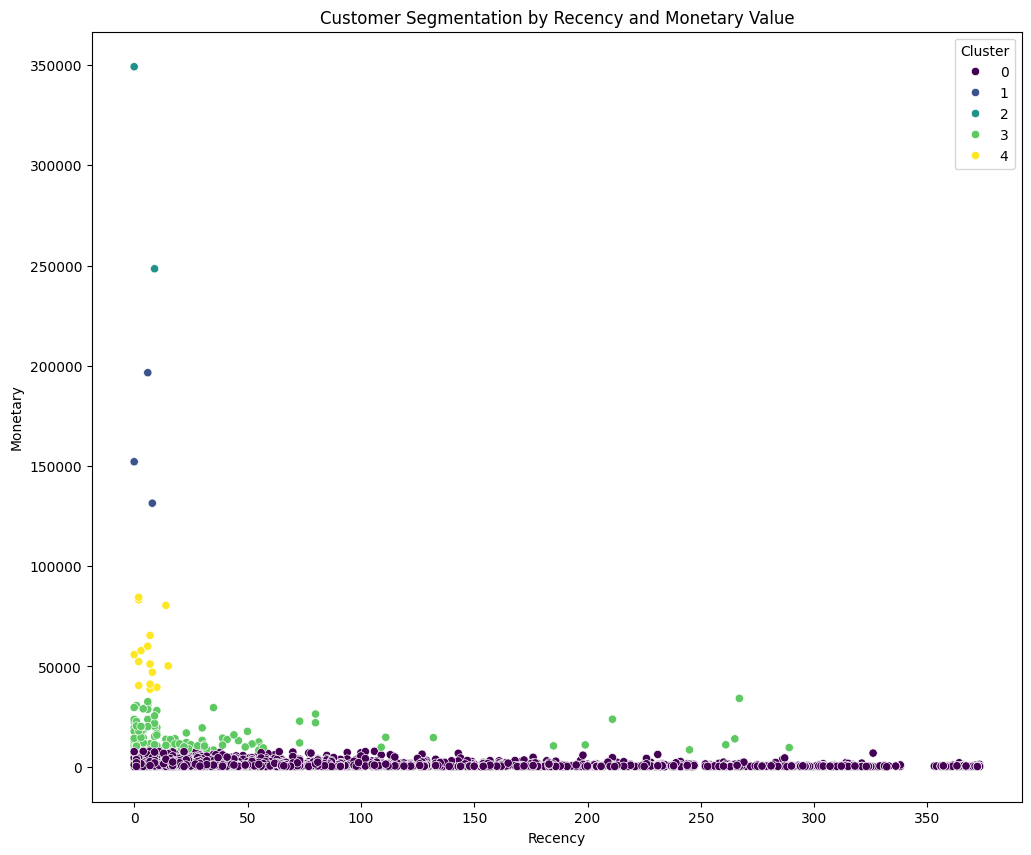

In [34]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.scatterplot(data= rfm, x="Recency", y="Monetary", hue= "Cluster", palette='viridis')
plt.title("Customer Segmentation by Recency and Monetary Value")
plt.show()

In [35]:
df.rename(columns={'Frequency ': 'Frequency'}, inplace=True)

In [36]:
df.columns = df.columns.str.strip()

In [37]:
cs_df['Customer ID']

0         13085.0
1         13085.0
2         13085.0
3         13085.0
4         13085.0
           ...   
525456    17530.0
525457    17530.0
525458    17530.0
525459    17530.0
525460    17530.0
Name: Customer ID, Length: 400947, dtype: float64

In [38]:
rfm = rfm.merge(cs_df[['Customer ID']], left_index=True, right_index=True)


In [39]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Monetary': 'mean',
    'Frequency': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'No of Customers'})

cluster_summary

,Monetary,Frequency,No of Customers
Cluster,,,
0,1236.059359,75.516954,3244
1,160038.050000,3057.000000,3
2,298780.425000,1200.500000,2
3,14712.947275,473.127451,102
4,54066.115385,815.153846,13
